## Comparative Study - Aligner Performance

NOTE: This notebook assumes that all previous notebooks in this directory have already been run to completion.

#### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Reading Results

In [2]:
variants = ["MAli-v1.31", "ClustalW2-MAli-Refine", "ClustalW2", "ClustalOmega", "MUSCLE"]

paths = []
for variant in variants:
    filename = f"sbench_{variant}_on_BALIS-1.csv"
    filepath = f"results/{filename}"
    paths.append(filepath)

#### Creating Combined Dataset 1

In [3]:
data = {
    "Q_score": [],
    "method": [],
    "time_elapsed_ms": [],
}

for i in range(len(variants)):
    label = variants[i]
    path = paths[i]
    df = pd.read_csv(path)

    score_values = list(df["Q_score"].values)
    time_elapsed_values = list(df["time_elapsed_ms"].values)
    method_labels = [label for j in range(len(score_values))]
    data["Q_score"] += score_values
    data["time_elapsed_ms"] += time_elapsed_values
    data["method"] += method_labels
    


In [4]:
df1 = pd.DataFrame(data)
df1.head()

,Q_score,method,time_elapsed_ms
0,0.0851,MAli-v1.31,10241
1,0.0512,MAli-v1.31,14767
2,0.2450,MAli-v1.31,13136
3,0.0917,MAli-v1.31,8319
4,0.1150,MAli-v1.31,6031


### Scatter Plot (Performance)

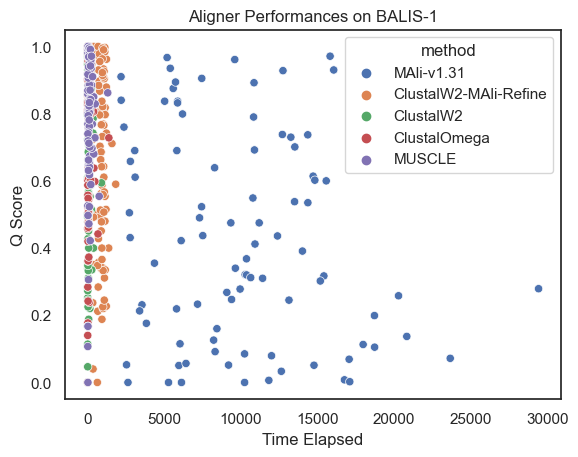

In [5]:
sns.set_theme(style="white")

sns.scatterplot(data=df1, x="time_elapsed_ms", y="Q_score", hue="method")
plt.ylim([-0.05, 1.05])
plt.ylabel("Q Score")
plt.xlabel("Time Elapsed")
plt.title("Aligner Performances on BALIS-1")

plt.savefig("images/CaseStudy_performances_all_BALIS-1")

plt.show()

#### Creating Combined Dataset 2

In [6]:
dataset = {
    "method": [],
    "mean_Q_score": [],
    "mean_time_elapsed_ms": []
}

In [7]:
for i in range(len(variants)):
    method_name = variants[i]
    path = paths[i]
    df = pd.read_csv(path)
    dataset["method"].append(method_name)
    dataset["mean_Q_score"].append(df['Q_score'].mean())
    dataset["mean_time_elapsed_ms"].append(df['time_elapsed_ms'].mean())

In [8]:
df2 = pd.DataFrame(dataset)
df2.head()

,method,mean_Q_score,mean_time_elapsed_ms
0,MAli-v1.31,0.427114,10029.422222
1,ClustalW2-MAli-Refine,0.655389,884.288889
2,ClustalW2,0.655497,91.011111
3,ClustalOmega,0.724278,104.900000
4,MUSCLE,0.774211,143.411111


### Scatter Plot (Average Performance)

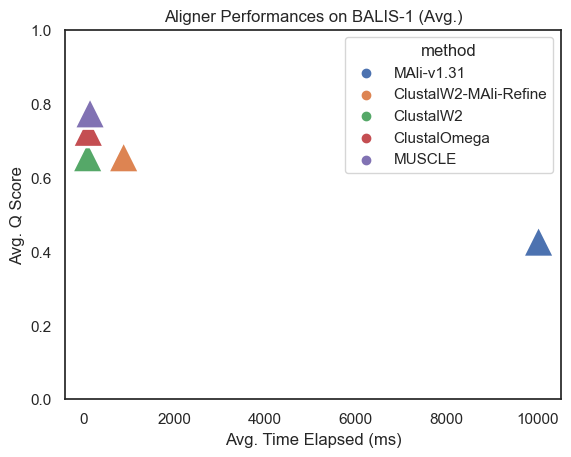

In [9]:
sns.set_theme(style="white")

sns.scatterplot(data=df2, x="mean_time_elapsed_ms", y="mean_Q_score", hue="method", s=500, marker="^")
plt.ylim([0, 1])
plt.ylabel("Avg. Q Score")
plt.xlabel("Avg. Time Elapsed (ms)")
plt.title("Aligner Performances on BALIS-1 (Avg.)")

plt.savefig("images/CaseStudy_performances_avg_BALIS-1")

plt.show()